In [1120]:
import copy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [1121]:
dataset = pd.read_csv('data/dataset/final.csv')

In [1122]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [1123]:
dataset.set_index('date', inplace=True)

In [1124]:
dataset.drop(['realized_variance'], axis=1, inplace=True)

In [1125]:
dataset.head()
dataset.dropna(inplace=True)

In [1126]:
day = 14

dataset['y_mu'] = (dataset.shift(-day)['usd/cad'] / dataset['usd/cad'] - 1)
dataset['y_jump'] = dataset.shift(-day)['jump']
dataset['y_bipower_variance'] = dataset.shift(-day)['bipower_variance']

dataset['jumplag1'] = dataset.shift(1)['jump']
dataset['bipowerlag1'] = dataset.shift(1)['bipower_variance']
dataset['mulag1'] = dataset.shift(day)['y_mu']

In [1127]:
dataset.dropna(inplace=True)

y_mu = dataset['y_mu']
y_jump = dataset['y_jump']
y_bipower_variance = dataset['y_bipower_variance']
dataset = dataset.drop(['y_mu', 'y_jump', 'y_bipower_variance'], axis=1)

In [1128]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

predictedVariable = y_mu

X_train, X_val, y_train, y_val = train_test_split(dataset, predictedVariable, test_size=0.00000001, shuffle=False)
X_test, X_train, y_test, y_train = train_test_split(X_train, y_train, test_size=0.80, shuffle=False)

# scaler = StandardScaler()
# scaler.fit(pd.DataFrame(y_train))
#
# y_train = scaler.transform(pd.DataFrame(y_train))
# y_test = scaler.transform(pd.DataFrame(y_test))
# y_val = scaler.transform(pd.DataFrame(y_val))


In [1129]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import numpy as np

alpha = [0.01, 0.001, 0.0018, 0.002, 0.003, 0.0001, 0.00001]
best_sse = 100000
best_alpha = None
for a in alpha:
    pipe = Pipeline([('scaler', StandardScaler()), ('ls', linear_model.Lasso(alpha=a))])
    pipe.fit(X_train, y_train)
    y_test_pred = pipe.predict(X_test)
    sse = np.sum((np.array(y_test_pred) - np.array(y_test))**2)
    print('sse: ', sse)
    if sse < best_sse:
        best_sse = sse
        best_mod = copy.deepcopy(pipe)
        best_alpha = a

print(best_alpha)
pipe = best_mod
y_train_pred = pipe.predict(X_train)
y_train_res = pd.DataFrame(y_train).to_numpy() - pd.DataFrame(y_train_pred).to_numpy()
y_train_res = pd.DataFrame(y_train_res)

y_test_pred = pipe.predict(X_test)
y_test_res = pd.DataFrame(y_test).to_numpy() - pd.DataFrame(y_test_pred).to_numpy()
y_test_res = pd.DataFrame(y_test_res)

sse:  0.11237971885181353
sse:  0.16379136838939173
sse:  0.17042521238309194
sse:  0.16077205007509734
sse:  0.12652200340776804


/Users/sebastienlegros/Git_code/pair_trading/.virtualenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.383e-03, tolerance: 6.673e-05
  model = cd_fast.enet_coordinate_descent(


sse:  0.1660516495288177
sse:  0.24378736830262193
0.01


/Users/sebastienlegros/Git_code/pair_trading/.virtualenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.988e-02, tolerance: 6.673e-05
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot: >

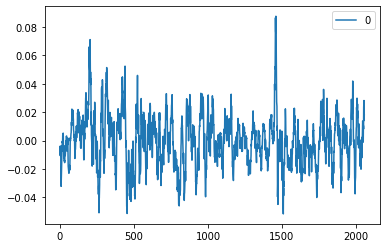

In [1130]:
y_train_res.plot()

In [1131]:
for i in range(len(X_train.columns)):
    print(X_train.columns[i], pipe['ls'].coef_[i])

usd/cad -0.0
DGS2 0.0
DGS3 0.0
DGS5 0.0
DGS10 0.0
cad_2y 0.0
cad_3y 0.0
cad_5y 0.0
cad_10y 0.0
us_2y -0.0
us_3y -0.0
us_5y 0.0
us_10y -0.0
convex1 0.0
convex2 0.0
convex3 -0.0
W.BCPI 0.0
W.BCNE 0.0
W.ENER 0.0
W.MTLS 0.0
W.FOPR -0.0
W.AGRI 0.0
W.FISH -0.0
can_rate 0.0
usd 0.0
jpy 0.0
czk -0.0
dkk -0.0
gbp -0.0
huf -0.0
pln -0.0
sek -0.0
chf 0.0
nok -0.0
aud -0.0
cad -0.0
hkd 0.0
krw -0.0
nzd -0.0
sgd -0.0
zar -0.0
us_rate 0.0
can_sentiment -0.0
log usd/cad -0.0
jump -0.0
bipower_variance -0.0
dhhngsp 0.0
dcoilwtico 0.0
dcoilbrenteu 0.0
will5000prfc -0.0
dpropanembtx 0.0
dhoilnyh 0.0
willresipr 0.0
vixcls -0.0
gvzcls -0.0
ovxcls -0.0
vxvcls -0.0
dexuseu 0.0
dexusuk 0.0
dexchus -0.0
dexjpus 0.0
dexkous -0.0
dexmxus -0.0
dexinus -0.0
dexvzus -0.0
dexbzus -0.0
dexszus -0.0
dtwexemegs -0.0
usrecd 0.0
eurorecd 0.0
jpnrecdp 0.0
usd/cad_lag_1 -0.0
usd/cad_lag_2 -0.0
usd/cad_lag_3 -0.0
jumplag1 -0.0
bipowerlag1 -0.0
mulag1 0.0


/Users/sebastienlegros/Git_code/pair_trading/.virtualenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


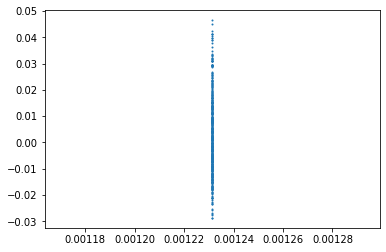

In [1132]:
import matplotlib.pyplot as plt
# Compute model performance on validation set
y_test_pred = pipe.predict(X_test)
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test , 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m*y_test_pred+b)
plt.show()

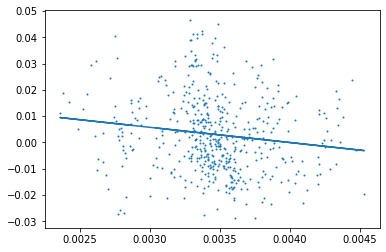

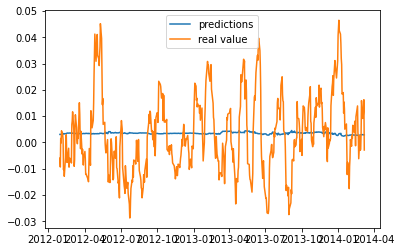

In [1133]:
best_sse = 100000
# max_feature = [2, 3, 4]
# max_depth = [2, 3, 4]
max_feature = [2]
max_depth = [2]
suivi = {'max_depth':[], 'max_feature':[], 'sse':[]}
for a in max_feature:
    for b in max_depth:
        pipe_forest = Pipeline([('rf', RandomForestRegressor(n_estimators=1000, max_features=a, max_depth=b))])
        pipe_forest.fit(X_train, np.ravel(y_train_res))
        y_test_res_pred = pipe_forest.predict(X_test)
        sse = np.sum((np.array(y_test_res_pred) - np.array(y_train_res))**2)
        suivi['max_depth'] += [b]
        suivi['max_feature'] += [a]
        suivi['sse'] += [sse]
        if sse < best_sse:
            best_sse = sse
            best_mod = copy.deepcopy(pipe_forest)
            best_feature = a
            best_depth = b

pipe_forest = best_mod


y_test_res_pred = pipe_forest.predict(X_test)
y_test_pred2 = y_test_pred
y_test_pred = y_test_res_pred + y_test_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test , 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m*y_test_pred+b)
plt.show()

plt.plot(X_test.index, y_test_pred, label='predictions')
plt.plot(X_test.index, y_test, label='real value')
plt.legend()
plt.show()

In [1134]:
suivi

{'max_depth': [2], 'max_feature': [2], 'sse': [348.3762350083145]}

In [1135]:
pipe_forest['rf'].feature_importances_

array([0.02693531, 0.01435035, 0.01307469, 0.01161659, 0.01259729,
       0.01562098, 0.01664768, 0.01644989, 0.01246687, 0.01358469,
       0.00510479, 0.00481188, 0.00358042, 0.01418552, 0.01120652,
       0.00442726, 0.02112112, 0.01072201, 0.03130129, 0.01296995,
       0.00699429, 0.01324761, 0.00901812, 0.01044139, 0.00542727,
       0.03491805, 0.01328959, 0.00717635, 0.01058201, 0.01649583,
       0.01091967, 0.00810787, 0.00781515, 0.01866077, 0.01343474,
       0.03667145, 0.00567434, 0.00894471, 0.01328168, 0.00675343,
       0.02132013, 0.00196927, 0.00140244, 0.0005002 , 0.01242496,
       0.0068909 , 0.00578221, 0.02753924, 0.0214081 , 0.0188965 ,
       0.00851718, 0.02395327, 0.00962658, 0.00873788, 0.00904514,
       0.01343649, 0.00951634, 0.00478782, 0.02019146, 0.0266991 ,
       0.01789184, 0.00673841, 0.0203566 , 0.00907101, 0.01068322,
       0.01773829, 0.00350998, 0.02133485, 0.00488668, 0.00021754,
       0.00171453, 0.02704201, 0.02280096, 0.03037411, 0.01136

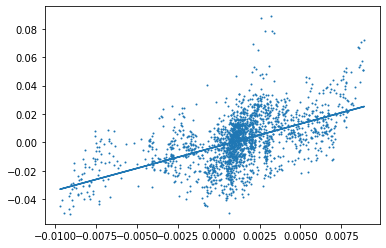

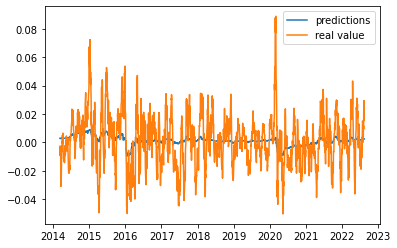

In [1136]:
y_train_res_pred = pipe_forest.predict(X_train)
y_train_pred2 = y_train_pred
y_train_pred = y_train_res_pred + y_train_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_train_pred, y_train , 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_train_pred, y_train, s=1)
plt.plot(y_train_pred, m*y_train_pred+b)
plt.show()

plt.plot(X_train.index, y_train_pred, label='predictions')
plt.plot(X_train.index, y_train, label='real value')
plt.legend()
plt.show()

In [1137]:
predictions = pipe.predict(dataset) + pipe_forest.predict(dataset)
residuals = predictions - y_mu

dataset['reslag1'] = residuals.shift(1)
dataset['reslag2'] = residuals.shift(2)
dataset['reslag3'] = residuals.shift(3)

y_jump = y_jump.iloc[3:]
y_bipower_variance = y_bipower_variance.iloc[3:]

dataset.dropna(inplace=True)

sse:  1.5133551928283094e-06
sse:  1.5133551928283094e-06
sse:  1.5133551928283094e-06
sse:  1.5133551928283094e-06
sse:  1.5133551928283094e-06
sse:  1.5133551928283094e-06
sse:  1.3795804453009891e-06
1e-05
usd/cad 0.0
DGS2 -0.0
DGS3 -0.0
DGS5 -0.0
DGS10 -0.0
cad_2y -0.0
cad_3y -0.0
cad_5y -0.0
cad_10y -0.0
us_2y 0.0
us_3y 0.0
us_5y 0.0
us_10y 0.0
convex1 0.0
convex2 0.0
convex3 -2.9088629206712537e-06
W.BCPI -0.0
W.BCNE -0.0
W.ENER -0.0
W.MTLS -0.0
W.FOPR -0.0
W.AGRI -0.0
W.FISH -0.0
can_rate -0.0
usd -0.0
jpy 0.0
czk 0.0
dkk 0.0
gbp -3.3315444999032018e-06
huf -0.0
pln 0.0
sek -0.0
chf -0.0
nok 0.0
aud -0.0
cad -0.0
hkd -0.0
krw -0.0
nzd -0.0
sgd -0.0
zar 0.0
us_rate -0.0
can_sentiment 0.0
log usd/cad 0.0
jump -0.0
bipower_variance 8.39517914130733e-06
dhhngsp -0.0
dcoilwtico -0.0
dcoilbrenteu -7.97857101428432e-06
will5000prfc -0.0
dpropanembtx -0.0
dhoilnyh -0.0
willresipr -0.0
vixcls 0.0
gvzcls 3.6433644624761064e-06
ovxcls 1.2362085076798895e-07
vxvcls 0.0
dexuseu -0.0
dexusuk 

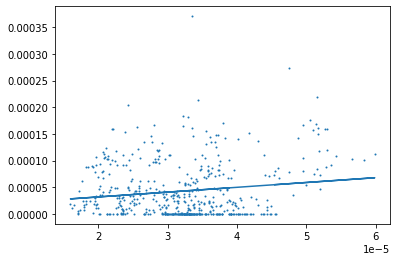

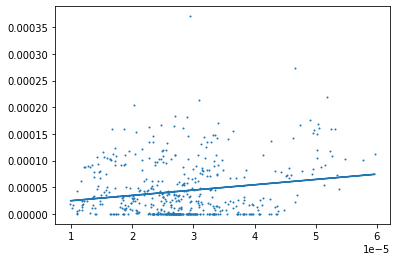

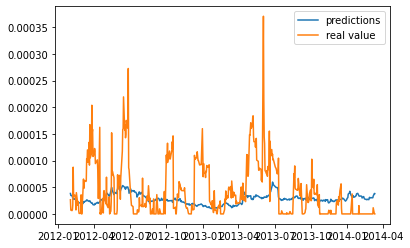

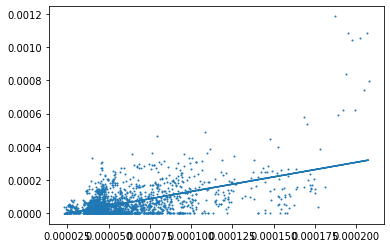

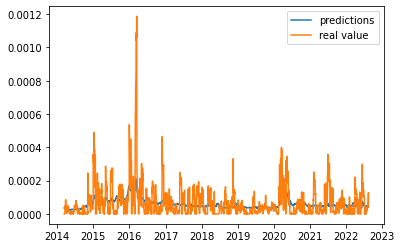

{'max_depth': [2], 'max_feature': [2], 'sse': [0.00867143568639141]}


In [1138]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

predictedVariable = y_jump


X_train, X_val, y_train, y_val = train_test_split(dataset, predictedVariable, test_size=0.00000001, shuffle=False)
X_test, X_train, y_test, y_train = train_test_split(X_train, y_train, test_size=0.80, shuffle=False)

# scaler = StandardScaler()
# scaler.fit(pd.DataFrame(y_train))
#
# y_train = scaler.transform(pd.DataFrame(y_train))
# y_test = scaler.transform(pd.DataFrame(y_test))
# y_val = scaler.transform(pd.DataFrame(y_val))

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import numpy as np

alpha = [0.01, 0.001, 0.0018, 0.002, 0.003, 0.0001, 0.00001]
best_sse = 100000
best_alpha = None
for a in alpha:
    pipe = Pipeline([('scaler', StandardScaler()), ('ls', linear_model.Lasso(alpha=a))])
    pipe.fit(X_train, y_train)
    y_test_pred = pipe.predict(X_test)
    sse = np.sum((np.array(y_test_pred) - np.array(y_test)) ** 2)
    print('sse: ', sse)
    if sse < best_sse:
        best_sse = sse
        best_mod = copy.deepcopy(pipe)
        best_alpha = a

print(best_alpha)
pipe = best_mod
y_train_pred = pipe.predict(X_train)
y_train_res = pd.DataFrame(y_train).to_numpy() - pd.DataFrame(y_train_pred).to_numpy()
y_train_res = pd.DataFrame(y_train_res)

y_test_pred = pipe.predict(X_test)
y_test_res = pd.DataFrame(y_test).to_numpy() - pd.DataFrame(y_test_pred).to_numpy()
y_test_res = pd.DataFrame(y_test_res)
# y_train_res.plot()
for i in range(len(X_train.columns)):
    print(X_train.columns[i], pipe['ls'].coef_[i])
import matplotlib.pyplot as plt

# Compute model performance on validation set
y_test_pred = pipe.predict(X_test)
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m * y_test_pred + b)
plt.show()
best_sse = 100000
# max_feature = [2, 3, 4]
# max_depth = [2, 3, 4]
max_feature = [2]
max_depth = [2]
suivi = {'max_depth': [], 'max_feature': [], 'sse': []}
for a in max_feature:
    for b in max_depth:
        pipe_forest = Pipeline([('rf', RandomForestRegressor(n_estimators=1000, max_features=a, max_depth=b))])
        pipe_forest.fit(X_train, np.ravel(y_train_res))
        y_test_res_pred = pipe_forest.predict(X_test)
        sse = np.sum((np.array(y_test_res_pred) - np.array(y_train_res)) ** 2)
        suivi['max_depth'] += [b]
        suivi['max_feature'] += [a]
        suivi['sse'] += [sse]
        if sse < best_sse:
            best_sse = sse
            best_mod = copy.deepcopy(pipe_forest)
            best_feature = a
            best_depth = b

pipe_forest = best_mod

y_test_res_pred = pipe_forest.predict(X_test)
y_test_pred2 = y_test_pred
y_test_pred = y_test_res_pred + y_test_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m * y_test_pred + b)
plt.show()

plt.plot(X_test.index, y_test_pred, label='predictions')
plt.plot(X_test.index, y_test, label='real value')
plt.legend()
plt.show()
suivi
pipe_forest['rf'].feature_importances_
y_train_res_pred = pipe_forest.predict(X_train)
y_train_pred2 = y_train_pred
y_train_pred = y_train_res_pred + y_train_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_train_pred, y_train, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_train_pred, y_train, s=1)
plt.plot(y_train_pred, m * y_train_pred + b)
plt.show()

plt.plot(X_train.index, y_train_pred, label='predictions')
plt.plot(X_train.index, y_train, label='real value')
plt.legend()
plt.show()

print(suivi)

sse:  9.296793711686711e-06
sse:  9.296793711686711e-06
sse:  9.296793711686711e-06
sse:  9.296793711686711e-06
sse:  9.296793711686711e-06
sse:  9.296793711686711e-06
sse:  8.151796306030823e-06
1e-05
usd/cad 0.0
DGS2 -0.0
DGS3 -0.0
DGS5 -0.0
DGS10 -0.0
cad_2y -0.0
cad_3y -0.0
cad_5y -0.0
cad_10y -0.0
us_2y 0.0
us_3y 0.0
us_5y 0.0
us_10y 0.0
convex1 0.0
convex2 0.0
convex3 -3.8501317695401713e-05
W.BCPI -0.0
W.BCNE -0.0
W.ENER -0.0
W.MTLS -0.0
W.FOPR -0.0
W.AGRI -0.0
W.FISH 0.0
can_rate 0.0
usd -0.0
jpy -0.0
czk 0.0
dkk -0.0
gbp -1.1461905710601337e-05
huf -4.204036893759822e-06
pln -0.0
sek -2.5283522575419204e-06
chf -0.0
nok -0.0
aud -0.0
cad -0.0
hkd -0.0
krw -0.0
nzd -8.553283000128226e-06
sgd -0.0
zar -0.0
us_rate -0.0
can_sentiment -0.0
log usd/cad 0.0
jump 2.7350343505293685e-05
bipower_variance 0.0
dhhngsp -0.0
dcoilwtico -0.0
dcoilbrenteu -3.2606192693881995e-05
will5000prfc -0.0
dpropanembtx -0.0
dhoilnyh -0.0
willresipr 0.0
vixcls 3.616090529518747e-05
gvzcls 2.02562466756

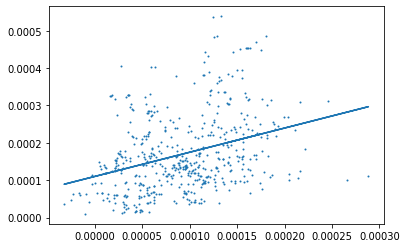

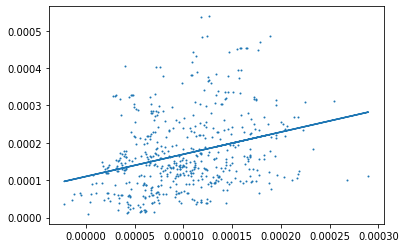

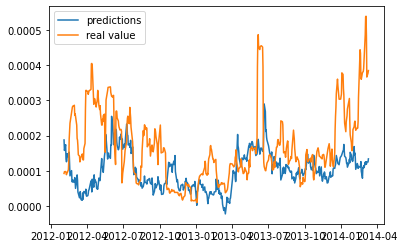

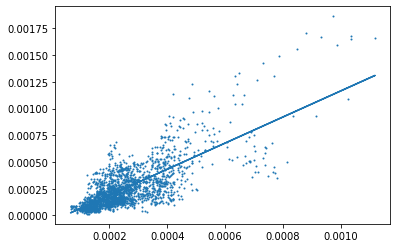

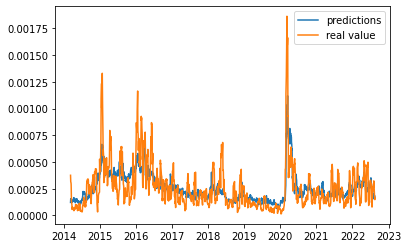

{'max_depth': [2], 'max_feature': [2], 'sse': [0.024926662459800034]}


In [1139]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

predictedVariable = y_bipower_variance

X_train, X_val, y_train, y_val = train_test_split(dataset, predictedVariable, test_size=0.00000001, shuffle=False)
X_test, X_train, y_test, y_train = train_test_split(X_train, y_train, test_size=0.80, shuffle=False)

# scaler = StandardScaler()
# scaler.fit(pd.DataFrame(y_train))
#
# y_train = scaler.transform(pd.DataFrame(y_train))
# y_test = scaler.transform(pd.DataFrame(y_test))
# y_val = scaler.transform(pd.DataFrame(y_val))

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import numpy as np

alpha = [0.01, 0.001, 0.0018, 0.002, 0.003, 0.0001, 0.00001]
best_sse = 100000
best_alpha = None
for a in alpha:
    pipe = Pipeline([('scaler', StandardScaler()), ('ls', linear_model.Lasso(alpha=a))])
    pipe.fit(X_train, y_train)
    y_test_pred = pipe.predict(X_test)
    sse = np.sum((np.array(y_test_pred) - np.array(y_test)) ** 2)
    print('sse: ', sse)
    if sse < best_sse:
        best_sse = sse
        best_mod = copy.deepcopy(pipe)
        best_alpha = a

print(best_alpha)
pipe = best_mod
y_train_pred = pipe.predict(X_train)
y_train_res = pd.DataFrame(y_train).to_numpy() - pd.DataFrame(y_train_pred).to_numpy()
y_train_res = pd.DataFrame(y_train_res)

y_test_pred = pipe.predict(X_test)
y_test_res = pd.DataFrame(y_test).to_numpy() - pd.DataFrame(y_test_pred).to_numpy()
y_test_res = pd.DataFrame(y_test_res)
# y_train_res.plot()
for i in range(len(X_train.columns)):
    print(X_train.columns[i], pipe['ls'].coef_[i])
import matplotlib.pyplot as plt

# Compute model performance on validation set
y_test_pred = pipe.predict(X_test)
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m * y_test_pred + b)
plt.show()
best_sse = 100000
# max_feature = [2, 3, 4]
# max_depth = [2, 3, 4]
max_feature = [2]
max_depth = [2]
suivi = {'max_depth': [], 'max_feature': [], 'sse': []}
for a in max_feature:
    for b in max_depth:
        pipe_forest = Pipeline([('rf', RandomForestRegressor(n_estimators=1000, max_features=a, max_depth=b))])
        pipe_forest.fit(X_train, np.ravel(y_train_res))
        y_test_res_pred = pipe_forest.predict(X_test)
        sse = np.sum((np.array(y_test_res_pred) - np.array(y_train_res)) ** 2)
        suivi['max_depth'] += [b]
        suivi['max_feature'] += [a]
        suivi['sse'] += [sse]
        if sse < best_sse:
            best_sse = sse
            best_mod = copy.deepcopy(pipe_forest)
            best_feature = a
            best_depth = b

pipe_forest = best_mod

y_test_res_pred = pipe_forest.predict(X_test)
y_test_pred2 = y_test_pred
y_test_pred = y_test_res_pred + y_test_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test_pred, y_test, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_test_pred, y_test, s=1)
plt.plot(y_test_pred, m * y_test_pred + b)
plt.show()

plt.plot(X_test.index, y_test_pred, label='predictions')
plt.plot(X_test.index, y_test, label='real value')
plt.legend()
plt.show()
suivi
pipe_forest['rf'].feature_importances_
y_train_res_pred = pipe_forest.predict(X_train)
y_train_pred2 = y_train_pred
y_train_pred = y_train_res_pred + y_train_pred2
# pipe['ls'].coef_


#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_train_pred, y_train, 1)
# m, b = np.polyfit(y_test_pred, y_test , 1)
#add linear regression line to scatterplot


plt.scatter(y_train_pred, y_train, s=1)
plt.plot(y_train_pred, m * y_train_pred + b)
plt.show()

plt.plot(X_train.index, y_train_pred, label='predictions')
plt.plot(X_train.index, y_train, label='real value')
plt.legend()
plt.show()
print(suivi)